# Working notebook 3

# **Goals:**

* Discover key attributes that drive and have a high correlation with home value.

* Use those attributes to develop a machine learning model to predict home value.

    * Carefully select features that will prevent data leakage. 


## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import wrangle as w
import model as m

# Acquire:

In [2]:
# acquire telco data 
df = w.get_zillow_data()

* Data acquire from Codeup Database 11/17/22

* It contained  52441 rows and 10 columns before cleaning

* Each row represents a single family household:
    * properties from 2017 with current transactions
    * located in the Californian counties of 'Los Angeles' or 'Orange'or 'Ventura'

* Each column represents a feature related to the single family residential.

In [ ]:
df.isnull().sum()

In [ ]:
52441 - 50446 

In [ ]:
(1995/52441) *100

In [ ]:
100 -((1995/52441) *100)

In [ ]:
# a total of 1995 rows were removed as outliers still maintain 96.2% of original total data
df = w.handle_outliers(df)

In [ ]:
df.isnull().sum()

In [ ]:
50446 

In [ ]:
# dropped properties with no bathrooms and no bedrooms 75 rows at still retained 96% of original data
df[(df.bathrooms==0) & (df.bedrooms ==0)]

In [ ]:
def no_beds_and_baths(df):
    df= df[~(df.bathrooms==0) & ~(df.bedrooms ==0)]
    
    return df

In [ ]:
# drop 0 beds and 0 baths
df= df[~(df.bathrooms==0) & ~(df.bedrooms ==0)]

In [ ]:
df.shape

In [ ]:
50326/52441

In [ ]:
df.isnull().sum()

In [ ]:
w.process_luxury_features(df)

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
# dropp nulls  a total of 40 rows at this point we have retain 95.9% of original data
df = df.dropna()

In [ ]:
df.shape

In [ ]:
50326-50286

In [ ]:
50286/52441

In [ ]:
def process_fancy_features(df):
    
    columns = ['fireplace','deck','pool','garage']    
    for feature in columns:
        df[feature]=df[feature].replace(r"^\s*$", np.nan, regex=True)     
        # fill fancy features with 0 assumption that if it was not mark it did not exist
        df[feature] = df[feature].fillna(0)
    return df

In [ ]:
def handle_outliers(df):
    """Manually handle outliers '"""
    df = df[df.bathrooms <= 6]
    
    df = df[df.bedrooms <= 6]
    
    df = df[df.home_value <= 1_750_000]
    
    return df

In [ ]:
def zillow_prep(df):
    
    # remove outliers
    df = handle_outliers(df)
    
    # removed rows with 0 beds and 0 baths
    df = df[~(df.bathrooms==0) & ~(df.bedrooms ==0)]
    
    # process nulls in luxury features:
    df = process_fancy_features(df)
    
    # drop nulls
    df = df.dropna()

    return df

In [ ]:
# FIPS code 6111 Ventura County, 6059  Orange County, 6037 Los Angeles County
df.county.value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
def new_features(df):
    #Creating new column for home age using year_built, casting as float
    df['home_age'] = 2017- df['yearbuilt']
    df["home_age"] = df["home_age"].astype('float')
    
    df['optional_features'] = (df.garage==1)|(df.deck == 1)|(df.pool == 1)|(df.fireplace == 1)
    
    return df
    
    

In [ ]:
def encode_features(df):
    df.fireplace = df.fireplace.replace({2:1, 3:1, 4:1, 5:1})
    df.deck= df.deck.replace({66:1})
    df.garage = df.garage.replace({2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 13:1,14:1})
    df.optional_features = df.optional_features.replace({False:0, True: 1})
    temp = pd.get_dummies(df['county'], drop_first=False)
    df = pd.concat([df, temp],axis =1)
    return df

In [ ]:
df.head()

In [ ]:
df =new_features(df)

In [ ]:
df.head()

In [ ]:
df=encode_features(df)

In [ ]:
df.head(5)

###                                                        <h1><center>Data Dictionary</center></h1>     


|Feature          | Description|
| :---------------: | :---------------------------------- |
| home_value (target) | The total tax assessed value of the parcel  |
| squarefeet:  | Calculated total finished living area of the home |
| bathrooms:   |  Number of bathrooms in home including fractional bathrooms |
| bedrooms: | Number of bedrooms in home  |
| yearbuilt:  |  The Year the principal residence was built   |
| fireplace: | fireplace on property (if any = 1) |
| deck:  | deck on property (if any = 1) |
| pool:  | pool on property (if any = 1) |
| garage: | garage on property (if any = 1) |
| county: | FIPS code for californian counties: 6111 Ventura County, 6059  Orange County, 6037 Los Angeles County |
| home_age: | The age of the home in 2017   |
|optional_features: |If a home has any of the follwing: fireplace, deck, pool, garage it is noted as 1   |
|additional Features: | 	Encoded and values for categorical data

# Prepare:

In [3]:
# prepare data 
df = w.zillow_prep(df)

In [4]:
# split data: train, validate and test
train, validate, test = w.split_data(df)

prepare actions:
* After the follwing steps I retained 95.9% of original data:
    * Outliers were removed
    (to better fit the definition of Single Family Property):
    
        * Beds above 6 
        * Baths above 6 
        * Home values above 1_750_000
        * Rows with both 0 beds and 0 baths 
        
    * For the following features it was assumed null values meant the structure did not exist on property:
        * fireplace (45198)
        * deck (52052)
        * pool (41345)
        * garage (34425)
            
    * The following null values were dropped:
        * home_value (1)
        * squarefeet (82)
        * yearbuilt (116)

* Encoded categorical variables
* Split data into train, validate and test 
    * Approximately: train 56%, validate 24%, test 20%
    * Stratified on 'churn'


In [5]:
df 

,home_value,squarefeet,bathrooms,bedrooms,yearbuilt,fireplace,deck,pool,garage,county,home_age,optional_features,los_angeles_county,orange_county,ventura_county
0,434855.0,1570.0,2.0,3.0,1956.0,0.0,0.0,0.0,0.0,6037.0,61.0,0,1,0,0
1,218089.0,981.0,1.0,2.0,1939.0,0.0,0.0,0.0,0.0,6037.0,78.0,0,1,0,0
2,161802.0,1484.0,1.0,2.0,1913.0,0.0,0.0,0.0,0.0,6037.0,104.0,0,1,0,0
3,635000.0,3108.0,3.0,5.0,2006.0,0.0,0.0,0.0,0.0,6037.0,11.0,0,1,0,0
4,424414.0,1518.0,2.0,3.0,1947.0,0.0,0.0,0.0,0.0,6037.0,70.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52435,469096.0,1122.0,1.0,3.0,1950.0,0.0,0.0,1.0,0.0,6037.0,67.0,1,1,0,0
52436,368765.0,1528.0,2.0,2.0,1961.0,0.0,0.0,0.0,0.0,6037.0,56.0,0,1,0,0
52438,468871.0,1336.0,2.0,3.0,1943.0,0.0,0.0,0.0,0.0,6037.0,74.0,0,1,0,0
52439,150291.0,860.0,1.0,2.0,1934.0,0.0,0.0,0.0,0.0,6037.0,83.0,0,1,0,0


In [6]:
train.head()

,home_value,squarefeet,bathrooms,bedrooms,yearbuilt,fireplace,deck,pool,garage,county,home_age,optional_features,los_angeles_county,orange_county,ventura_county
32899,346258.0,1026.0,1.0,2.0,1924.0,0.0,0.0,0.0,0.0,6037.0,93.0,0,1,0,0
4511,520000.0,1728.0,2.0,3.0,1987.0,0.0,0.0,0.0,0.0,6037.0,30.0,0,1,0,0
29470,217589.0,1840.0,2.0,4.0,1973.0,0.0,0.0,0.0,1.0,6059.0,44.0,0,0,1,0
15398,210507.0,2581.0,3.0,4.0,1994.0,0.0,0.0,1.0,0.0,6037.0,23.0,1,1,0,0
14156,294263.0,902.0,2.0,2.0,1950.0,0.0,0.0,0.0,0.0,6037.0,67.0,0,1,0,0


In [7]:
train.shape, validate.shape, test.shape

((28159, 15), (12069, 15), (10058, 15))

# Looking at the data

In [8]:
train.head(10)

,home_value,squarefeet,bathrooms,bedrooms,yearbuilt,fireplace,deck,pool,garage,county,home_age,optional_features,los_angeles_county,orange_county,ventura_county
32899,346258.0,1026.0,1.0,2.0,1924.0,0.0,0.0,0.0,0.0,6037.0,93.0,0,1,0,0
4511,520000.0,1728.0,2.0,3.0,1987.0,0.0,0.0,0.0,0.0,6037.0,30.0,0,1,0,0
29470,217589.0,1840.0,2.0,4.0,1973.0,0.0,0.0,0.0,1.0,6059.0,44.0,0,0,1,0
15398,210507.0,2581.0,3.0,4.0,1994.0,0.0,0.0,1.0,0.0,6037.0,23.0,1,1,0,0
14156,294263.0,902.0,2.0,2.0,1950.0,0.0,0.0,0.0,0.0,6037.0,67.0,0,1,0,0
32788,241475.0,1719.0,2.5,3.0,1992.0,1.0,0.0,0.0,1.0,6111.0,25.0,1,0,0,1
19187,108271.0,2018.0,3.0,3.0,1960.0,0.0,0.0,1.0,0.0,6037.0,57.0,1,1,0,0
29240,243917.0,2542.0,3.0,3.0,1955.0,0.0,0.0,0.0,0.0,6037.0,62.0,0,1,0,0
24385,482506.0,1668.0,2.0,3.0,1979.0,0.0,0.0,1.0,1.0,6059.0,38.0,1,0,1,0
46165,413000.0,1351.0,2.0,3.0,1954.0,0.0,0.0,0.0,0.0,6037.0,63.0,0,1,0,0


# Data Summary

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
home_value,28159.0,435017.576015,332865.944266,3254.0,187537.5,362951.0,583900.5,1750000.0
squarefeet,28159.0,1832.225576,803.292556,300.0,1256.0,1633.0,2227.0,8251.0
bathrooms,28159.0,2.228506,0.884596,1.0,2.0,2.0,3.0,6.0
bedrooms,28159.0,3.273483,0.886781,1.0,3.0,3.0,4.0,6.0
yearbuilt,28159.0,1963.118719,22.663952,1878.0,1950.0,1960.0,1978.0,2015.0
fireplace,28159.0,0.141376,0.348415,0.0,0.0,0.0,0.0,1.0
deck,28159.0,0.006925,0.082929,0.0,0.0,0.0,0.0,1.0
pool,28159.0,0.204020,0.402991,0.0,0.0,0.0,0.0,1.0
garage,28159.0,0.344259,0.475135,0.0,0.0,0.0,1.0,1.0
county,28159.0,6049.246031,21.220257,6037.0,6037.0,6037.0,6059.0,6111.0


# Explore:

## Does contract type affect churn?

In [ ]:
# Obtain plot for contract type vs churn
e.get_plot_contract(train)

* **It seems that customers with a two-year contracts churn less than customers with month-to-month contract.**

**I will now conduct a chi-square test to determine if there is an association between contract type and churn.**

* The confidence interval is 95%
* Alpha is set to 0.05 

$H_0$: There is **no** relationship between contract type and churn.

$H_a$: There is a relationship between contract type and churn.

In [ ]:
# Obtain chi-square on Contract type
e.get_chi2_contract(train)

The p-value is less than alpha. **There is evidence to support that tenure has an association with churn.** I believe that tenure is a driver of churn. Adding an encoded version of this feature to the model will likely increase the mode's accuracy.

# Exploration Summary

* A
* B
* C

# Features that will be included in my model

* **A**  has a significant statistical relationship to 
* **B**  has a significant statistical relationship to 
* **C**  has a significant statistical relationship to 


# Features that will be not included in my model

* **D** did not ..
* **Other features** have ..

# Modeling:

## Scaling

# Prepare  data for models

In [10]:
# prepare data for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test = m.model_data_prep(train, validate, test)

In [ ]:
train.head()

In [ ]:
def model_data_prep(train, validate,test):
    X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['squarefeet','bathrooms','bedrooms','yearbuilt','home_age'])
    # Setup X and y
    X_train_scaled = X_train_scaled.drop(columns=['home_value','county'])
    y_train = train.home_value

    X_validate_scaled = X_validate_scaled.drop(columns=['home_value','county'])
    y_validate = validate.home_value

    X_test_scaled = X_test_scaled.drop(columns=['home_value','county'])
    y_test = test.home_value
    
    return X_train_scaled,y_train, X_validate_scaled,y_validate, X_test_scaled, y_test

In [ ]:
X_train_scaled

In [ ]:
y_train

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['squarefeet','bathrooms','bedrooms','yearbuilt','home_age']):
    '''
    scale_data takes in train , validate, test data  and returns their scaled counterparts.
    '''
    # create copies of our original data
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #create the scaler
    scaler = MinMaxScaler()
    # fit the scaler into train data
    scaler.fit(train[columns_to_scale])
    
    # applying the scaler to train, validate, and test data
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    return train_scaled, validate_scaled, test_scaled

In [ ]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['squarefeet','bathrooms','bedrooms','yearbuilt','home_age'])

In [ ]:
# Setup X and y
X_train_scaled = X_train_scaled.drop(columns=['home_value','county'])
y_train = train.home_value

X_validate_scaled = X_validate_scaled.drop(columns=['home_value','county'])
y_validate = validate.home_value

X_test_scaled = X_test_scaled.drop(columns=['home_value','county'])
y_test = test.home_value

In [ ]:
X_train_scaled

In [ ]:

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train, y_train)
# 3. use the thing (make predictions)
X_validate = validate[['taxamount']]
predictions['OLS'] = lm.predict(X_validate)

# Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:


#scores.loc[len(scores.index)] = [key, f, RMSE_baseline, RMSE, R2, RMSE_val, R2_val, diff]

In [13]:
# set up dataframe for predictions, add actual values
train_pred = pd.DataFrame({
    'actual': train.home_value
}) 
validate_pred = pd.DataFrame({
    'actual': validate.home_value
}) 

## Baseline

In [14]:
# add a baseline model
train_pred['baseline_mean'] = train.home_value.mean()
validate_pred['baseline_mean'] = validate.home_value.mean()

train_pred['baseline_median'] = train.home_value.median()
validate_pred['baseline_median'] = validate.home_value.median()

In [15]:

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train, y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model'] = lm.predict(X_train)
validate_pred['OLS_Model'] = lm.predict(X_validate)

In [16]:
train_pred

,actual,baseline_mean,baseline_median,OLS_Model
32899,346258.0,435017.576015,362951.0,280576.0
4511,520000.0,435017.576015,362951.0,355328.0
29470,217589.0,435017.576015,362951.0,409600.0
15398,210507.0,435017.576015,362951.0,566272.0
14156,294263.0,435017.576015,362951.0,277504.0
...,...,...,...,...
23414,73891.0,435017.576015,362951.0,365568.0
39632,113492.0,435017.576015,362951.0,514048.0
47144,189810.0,435017.576015,362951.0,430080.0
45444,299124.0,435017.576015,362951.0,499712.0


In [17]:
validate_pred

,actual,baseline_mean,baseline_median,OLS_Model
39225,389492.0,425537.874306,352079.0,282624.0
15407,318000.0,425537.874306,352079.0,510976.0
37785,248333.0,425537.874306,352079.0,442368.0
30638,457701.0,425537.874306,352079.0,536576.0
30573,369895.0,425537.874306,352079.0,503808.0
...,...,...,...,...
26970,465000.0,425537.874306,352079.0,331776.0
18965,467781.0,425537.874306,352079.0,514048.0
2798,193418.0,425537.874306,352079.0,332800.0
10674,76597.0,425537.874306,352079.0,329728.0


## Using Kbest 7 features

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 7 features
f_selector = SelectKBest(f_regression, k=7)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()


In [ ]:
X_train[f_feature]

In [19]:
X_train.columns.to_list()

['squarefeet',
 'bathrooms',
 'bedrooms',
 'yearbuilt',
 'fireplace',
 'deck',
 'pool',
 'garage',
 'home_age',
 'optional_features',
 'los_angeles_county',
 'orange_county',
 'ventura_county']

In [23]:
# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_f7'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_f7'] = lm.predict(X_validate[f_feature])

In [24]:
train_pred

,actual,baseline_mean,baseline_median,OLS_Model,OLS_Model_f7
32899,346258.0,435017.576015,362951.0,280576.0,282112.0
4511,520000.0,435017.576015,362951.0,355328.0,387072.0
29470,217589.0,435017.576015,362951.0,409600.0,356352.0
15398,210507.0,435017.576015,362951.0,566272.0,606720.0
14156,294263.0,435017.576015,362951.0,277504.0,289280.0
...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,365568.0,386560.0
39632,113492.0,435017.576015,362951.0,514048.0,458752.0
47144,189810.0,435017.576015,362951.0,430080.0,445440.0
45444,299124.0,435017.576015,362951.0,499712.0,436736.0


# Using Kbest 4 features

In [25]:
# parameters: f_regression stats test, give me 4 features
f_selector = SelectKBest(f_regression, k=4)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_f4'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_f4'] = lm.predict(X_validate[f_feature])

In [27]:
X_train[f_feature]

,squarefeet,bathrooms,bedrooms,yearbuilt
32899,0.091309,0.0,0.2,0.335766
4511,0.179600,0.2,0.4,0.795620
29470,0.193686,0.2,0.6,0.693431
15398,0.286882,0.4,0.6,0.846715
14156,0.075714,0.2,0.2,0.525547
...,...,...,...,...
23414,0.143378,0.4,0.4,0.686131
39632,0.254056,0.4,0.8,0.693431
47144,0.161238,0.2,0.2,0.554745
45444,0.192932,0.2,0.4,0.562044


In [28]:
train_pred

,actual,baseline_mean,baseline_median,OLS_Model,OLS_Model_f7,OLS_Model_f4
32899,346258.0,435017.576015,362951.0,280576.0,282112.0,287241.703373
4511,520000.0,435017.576015,362951.0,355328.0,387072.0,395767.363321
29470,217589.0,435017.576015,362951.0,409600.0,356352.0,370853.817907
15398,210507.0,435017.576015,362951.0,566272.0,606720.0,584901.850029
14156,294263.0,435017.576015,362951.0,277504.0,289280.0,292016.844716
...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,365568.0,386560.0,394404.737720
39632,113492.0,435017.576015,362951.0,514048.0,458752.0,477067.644446
47144,189810.0,435017.576015,362951.0,430080.0,445440.0,450191.028533
45444,299124.0,435017.576015,362951.0,499712.0,436736.0,446507.992826


# Using Kbest 3 features

In [33]:
# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k=3)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_f3'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_f3'] = lm.predict(X_validate[f_feature])

In [34]:
X_train[f_feature]

,squarefeet,bathrooms,bedrooms
32899,0.091309,0.0,0.2
4511,0.179600,0.2,0.4
29470,0.193686,0.2,0.6
15398,0.286882,0.4,0.6
14156,0.075714,0.2,0.2
...,...,...,...
23414,0.143378,0.4,0.4
39632,0.254056,0.4,0.8
47144,0.161238,0.2,0.2
45444,0.192932,0.2,0.4


In [35]:
train_pred

,actual,baseline_mean,baseline_median,OLS_Model,OLS_Model_f7,OLS_Model_f4,OLS_Model_f3
32899,346258.0,435017.576015,362951.0,280576.0,282112.0,287241.703373,270166.900089
4511,520000.0,435017.576015,362951.0,355328.0,387072.0,395767.363321,417441.926284
29470,217589.0,435017.576015,362951.0,409600.0,356352.0,370853.817907,379885.806624
15398,210507.0,435017.576015,362951.0,566272.0,606720.0,584901.850029,600204.452655
14156,294263.0,435017.576015,362951.0,277504.0,289280.0,292016.844716,287196.223914
...,...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,365568.0,386560.0,394404.737720,395928.534685
39632,113492.0,435017.576015,362951.0,514048.0,458752.0,477067.644446,474987.157062
47144,189810.0,435017.576015,362951.0,430080.0,445440.0,450191.028533,447007.482989
45444,299124.0,435017.576015,362951.0,499712.0,436736.0,446507.992826,442353.681375


# OLS_ RFE  features = 7  

In [36]:
columns = X_train.columns.to_list()

In [37]:
X_train

,squarefeet,bathrooms,bedrooms,yearbuilt,fireplace,deck,pool,garage,home_age,optional_features,los_angeles_county,orange_county,ventura_county
32899,0.091309,0.0,0.2,0.335766,0.0,0.0,0.0,0.0,0.664234,0,1,0,0
4511,0.179600,0.2,0.4,0.795620,0.0,0.0,0.0,0.0,0.204380,0,1,0,0
29470,0.193686,0.2,0.6,0.693431,0.0,0.0,0.0,1.0,0.306569,0,0,1,0
15398,0.286882,0.4,0.6,0.846715,0.0,0.0,1.0,0.0,0.153285,1,1,0,0
14156,0.075714,0.2,0.2,0.525547,0.0,0.0,0.0,0.0,0.474453,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,0.143378,0.4,0.4,0.686131,0.0,0.0,0.0,0.0,0.313869,0,1,0,0
39632,0.254056,0.4,0.8,0.693431,0.0,0.0,0.0,1.0,0.306569,0,0,1,0
47144,0.161238,0.2,0.2,0.554745,0.0,0.0,0.0,0.0,0.445255,0,1,0,0
45444,0.192932,0.2,0.4,0.562044,0.0,0.0,0.0,1.0,0.437956,0,0,1,0


In [40]:
from sklearn.feature_selection import RFE
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=7)
rfe.fit(X_train, y_train)
print('selected top 7 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe7'] = lm.predict(X_train_rfe)

selected top 7 features: Index(['squarefeet', 'bedrooms', 'yearbuilt', 'home_age', 'los_angeles_county',
       'orange_county', 'ventura_county'],
      dtype='object')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [41]:
# 3. Make predictions


X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe7'] = lm.predict(X_validate_rfe)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [42]:
train_pred

,actual,baseline_mean,baseline_median,OLS_Model,OLS_Model_f7,OLS_Model_f4,OLS_Model_f3,OLS_rfe7
32899,346258.0,435017.576015,362951.0,280576.0,282112.0,287241.703373,270166.900089,294400.0
4511,520000.0,435017.576015,362951.0,355328.0,387072.0,395767.363321,417441.926284,378368.0
29470,217589.0,435017.576015,362951.0,409600.0,356352.0,370853.817907,379885.806624,432640.0
15398,210507.0,435017.576015,362951.0,566272.0,606720.0,584901.850029,600204.452655,551424.0
14156,294263.0,435017.576015,362951.0,277504.0,289280.0,292016.844716,287196.223914,237056.0
...,...,...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,365568.0,386560.0,394404.737720,395928.534685,311296.0
39632,113492.0,435017.576015,362951.0,514048.0,458752.0,477067.644446,474987.157062,511488.0
47144,189810.0,435017.576015,362951.0,430080.0,445440.0,450191.028533,447007.482989,423936.0
45444,299124.0,435017.576015,362951.0,499712.0,436736.0,446507.992826,442353.681375,504832.0


# OLS_RFE 4 features

In [43]:
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=4)
rfe.fit(X_train, y_train)
print('selected top 4 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe4'] = lm.predict(X_train_rfe)
X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe4'] = lm.predict(X_validate_rfe)

selected top 4 features: Index(['yearbuilt', 'los_angeles_county', 'orange_county', 'ventura_county'], dtype='object')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# OLS_RFE 3 features

In [44]:
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=3)
rfe.fit(X_train, y_train)
print('selected top 3 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe3'] = lm.predict(X_train_rfe)
X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe3'] = lm.predict(X_validate_rfe)

selected top 3 features: Index(['los_angeles_county', 'orange_county', 'ventura_county'], dtype='object')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# OLS_RFE 2 features

In [45]:
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=2)
rfe.fit(X_train, y_train)
print('selected top 2 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe2'] = lm.predict(X_train_rfe)
X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe2'] = lm.predict(X_validate_rfe)

selected top 2 features: Index(['orange_county', 'ventura_county'], dtype='object')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [46]:
train_pred

,actual,baseline_mean,baseline_median,OLS_Model,OLS_Model_f7,OLS_Model_f4,OLS_Model_f3,OLS_rfe7,OLS_rfe4,OLS_rfe3,OLS_rfe2
32899,346258.0,435017.576015,362951.0,280576.0,282112.0,287241.703373,270166.900089,294400.0,291042.0,395250.0,394939.871862
4511,520000.0,435017.576015,362951.0,355328.0,387072.0,395767.363321,417441.926284,378368.0,489868.0,395250.0,394939.871862
29470,217589.0,435017.576015,362951.0,409600.0,356352.0,370853.817907,379885.806624,432640.0,512868.0,515033.0,515670.961094
15398,210507.0,435017.576015,362951.0,566272.0,606720.0,584901.850029,600204.452655,551424.0,511960.0,395250.0,394939.871862
14156,294263.0,435017.576015,362951.0,277504.0,289280.0,292016.844716,287196.223914,237056.0,373098.0,395250.0,394939.871862
...,...,...,...,...,...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,365568.0,386560.0,394404.737720,395928.534685,311296.0,442528.0,395250.0,394939.871862
39632,113492.0,435017.576015,362951.0,514048.0,458752.0,477067.644446,474987.157062,511488.0,512868.0,515033.0,515670.961094
47144,189810.0,435017.576015,362951.0,430080.0,445440.0,450191.028533,447007.482989,423936.0,385722.0,395250.0,394939.871862
45444,299124.0,435017.576015,362951.0,499712.0,436736.0,446507.992826,442353.681375,504832.0,456062.0,515033.0,515670.961094


# Polynomial

In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 2

In [48]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['poly_d2'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['poly_d2'] = lm.predict(X_validate_poly)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
validate_pred

,actual,baseline_mean,baseline_median,OLS_Model,OLS_Model_f7,OLS_Model_f4,OLS_Model_f3,OLS_rfe7,OLS_rfe4,OLS_rfe3,OLS_rfe2,poly_d2
39225,389492.0,425537.874306,352079.0,282624.0,295936.0,302459.417506,299698.630995,268800.0,388878.0,395250.0,394939.871862,282112.0
15407,318000.0,425537.874306,352079.0,510976.0,547328.0,523488.999859,534634.833123,481280.0,493024.0,395250.0,394939.871862,468992.0
37785,248333.0,425537.874306,352079.0,442368.0,383488.0,391972.952115,396478.923135,418304.0,481310.0,515033.0,515670.961094,328704.0
30638,457701.0,425537.874306,352079.0,536576.0,565760.0,577832.689116,586291.946230,524800.0,477244.0,395250.0,394939.871862,507904.0
30573,369895.0,425537.874306,352079.0,503808.0,524800.0,525672.433400,547090.710668,518656.0,563704.0,485197.0,485531.461380,530944.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26970,465000.0,425537.874306,352079.0,331776.0,346112.0,353956.189902,350697.223964,329216.0,388878.0,395250.0,394939.871862,327168.0
18965,467781.0,425537.874306,352079.0,514048.0,532480.0,502921.973471,489935.157670,438784.0,388878.0,395250.0,394939.871862,532992.0
2798,193418.0,425537.874306,352079.0,332800.0,365568.0,378180.732265,402400.866606,353280.0,499336.0,395250.0,394939.871862,273408.0
10674,76597.0,425537.874306,352079.0,329728.0,347136.0,310144.450772,311059.781088,327168.0,363630.0,395250.0,394939.871862,384000.0


# Degree 3

In [50]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['poly_d3'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['poly_d3'] = lm.predict(X_validate_poly)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Degree 4

In [51]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['poly_d4'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['poly_d4'] = lm.predict(X_validate_poly)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Evaluate Models

In [53]:
train_pred

,actual,baseline_mean,baseline_median,OLS_Model,OLS_Model_f7,OLS_Model_f4,OLS_Model_f3,OLS_rfe7,OLS_rfe4,OLS_rfe3,OLS_rfe2,poly_d2,poly_d3,poly_d4
32899,346258.0,435017.576015,362951.0,280576.0,282112.0,287241.703373,270166.900089,294400.0,291042.0,395250.0,394939.871862,316416.0,285952.0,300800.0
4511,520000.0,435017.576015,362951.0,355328.0,387072.0,395767.363321,417441.926284,378368.0,489868.0,395250.0,394939.871862,300032.0,271104.0,275712.0
29470,217589.0,435017.576015,362951.0,409600.0,356352.0,370853.817907,379885.806624,432640.0,512868.0,515033.0,515670.961094,412160.0,394240.0,377856.0
15398,210507.0,435017.576015,362951.0,566272.0,606720.0,584901.850029,600204.452655,551424.0,511960.0,395250.0,394939.871862,522240.0,494592.0,495104.0
14156,294263.0,435017.576015,362951.0,277504.0,289280.0,292016.844716,287196.223914,237056.0,373098.0,395250.0,394939.871862,273408.0,263424.0,270592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,365568.0,386560.0,394404.737720,395928.534685,311296.0,442528.0,395250.0,394939.871862,350208.0,324864.0,307200.0
39632,113492.0,435017.576015,362951.0,514048.0,458752.0,477067.644446,474987.157062,511488.0,512868.0,515033.0,515670.961094,488960.0,410112.0,401664.0
47144,189810.0,435017.576015,362951.0,430080.0,445440.0,450191.028533,447007.482989,423936.0,385722.0,395250.0,394939.871862,404992.0,416000.0,409856.0
45444,299124.0,435017.576015,362951.0,499712.0,436736.0,446507.992826,442353.681375,504832.0,456062.0,515033.0,515670.961094,353792.0,361472.0,345600.0


In [88]:
def evaluate_metrics(df, col,actual):
    MSE = mean_squared_error(actual, df[col])
    SSE = MSE * len(df)
    RMSE = MSE ** .5
    ESS = ((df[col] - actual.mean())**2).sum()
    TSS = ESS + SSE
    return MSE, SSE, RMSE,ESS, TSS

In [ ]:
# create the metric_df as a blank dataframe
metric_df = pd.DataFrame()
# make our first entry into the metric_df with median baseline
metric_df = make_metric_df(y_train.urea,
                           y_train.urea_pred_mean,
                           'mean_baseline',
                          metric_df)

        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)

In [ ]:
train.tax_value - train.yhat

In [ ]:
baseline = train.tax_value.mean()
train['baseline']=baseline
baseline

In [ ]:
RMSE_baseline-RMSE

In [128]:
metric_df = pd.DataFrame(columns =['model','MSE','SSE','RMSE','ESS','TSS','R2'])
for i in col:
    MSE,SSE, RMSE, ESS, TSS = evaluate_metrics(train_pred, i , y_train)
    R2 = ESS/TSS
    metric_df= metric_df.append({
                    'model': i,
                    'MSE':MSE,
                     'SSE':SSE,
                     'RMSE':RMSE,
                     'ESS':ESS,
                     'TSS':TSS,
                     'R2':R2},ignore_index=True)
    

/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_3302/3017919260.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df= metric_df.append({
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_3302/3017919260.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df= metric_df.append({
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_3302/3017919260.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df= metric_df.append({
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_3302/3017919260.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df= metric_df.append({
/var/folders/gl/

In [129]:
metric_df

,model,MSE,SSE,RMSE,ESS,TSS,R2
0,actual,0.0,0.0,0.0,3119898990285849.0,3119898990285849.0,1.0
1,baseline_mean,110795802062.78096,3119898990285849.0,332860.033742,0.0,3119898990285849.0,0.0
2,baseline_median,115989393441.274048,3266145329912836.0,340572.155998,146246339626987.0625,3412391669539823.0,0.042857
3,OLS_Model,72631943457.157959,2045242895810111.0,269503.141832,1075476782406197.375,3120719678216308.5,0.344625
4,OLS_Model_f7,73527632768.306793,2070464611122751.0,271159.791946,1052513021406581.75,3122977632529333.0,0.337022
5,OLS_Model_f4,73745661127.296219,2076604071683534.25,271561.52365,1043294918602332.375,3119898990285866.5,0.3344
6,OLS_Model_f3,73971920691.957504,2082975314764831.25,271977.794483,1036923675521034.375,3119898990285865.5,0.332358
7,OLS_rfe7,73635753396.945023,2073509179904575.0,271359.085709,1046246372918213.125,3119755552822788.0,0.335362
8,OLS_rfe4,103385550344.680527,2911233712155859.0,321536.234886,208328284548999.5,3119561996704858.5,0.066781
9,OLS_rfe3,107798327983.619843,3035493117690751.0,328326.556927,83106647641620.46875,3118599765332371.5,0.026649


In [130]:
metric_df.columns
col2=['MSE', 'SSE', 'RMSE', 'ESS', 'TSS', 'R2']

In [131]:
metric_df.RMSE[1]

332860.03374208347

In [132]:
metric_df['bl_mean-RMSE']= metric_df.RMSE[1]-metric_df.RMSE

In [133]:
metric_df['bl_median-RMSE']= metric_df.RMSE[2]-metric_df.RMSE

In [137]:
metric_df['bl_medianr2-r2']= metric_df.R2[2]-metric_df.R2

In [138]:
metric_df['bl_meanr2-r2']= metric_df.R2[1]-metric_df.R2

In [139]:
metric_df


,model,MSE,SSE,RMSE,ESS,TSS,R2,bl_mean-RMSE,bl_median-RMSE,bl_medianr2-r2,bl_meanr2-r2
0,actual,0.0,0.0,0.0,3119898990285849.0,3119898990285849.0,1.0,332860.033742,340572.155998,-0.957143,-1.0
1,baseline_mean,110795802062.78096,3119898990285849.0,332860.033742,0.0,3119898990285849.0,0.0,0.0,7712.122256,0.042857,0.0
2,baseline_median,115989393441.274048,3266145329912836.0,340572.155998,146246339626987.0625,3412391669539823.0,0.042857,-7712.122256,0.0,0.0,-0.042857
3,OLS_Model,72631943457.157959,2045242895810111.0,269503.141832,1075476782406197.375,3120719678216308.5,0.344625,63356.89191,71069.014167,-0.301767,-0.344625
4,OLS_Model_f7,73527632768.306793,2070464611122751.0,271159.791946,1052513021406581.75,3122977632529333.0,0.337022,61700.241796,69412.364052,-0.294165,-0.337022
5,OLS_Model_f4,73745661127.296219,2076604071683534.25,271561.52365,1043294918602332.375,3119898990285866.5,0.3344,61298.510092,69010.632348,-0.291543,-0.3344
6,OLS_Model_f3,73971920691.957504,2082975314764831.25,271977.794483,1036923675521034.375,3119898990285865.5,0.332358,60882.239259,68594.361515,-0.289501,-0.332358
7,OLS_rfe7,73635753396.945023,2073509179904575.0,271359.085709,1046246372918213.125,3119755552822788.0,0.335362,61500.948033,69213.070289,-0.292504,-0.335362
8,OLS_rfe4,103385550344.680527,2911233712155859.0,321536.234886,208328284548999.5,3119561996704858.5,0.066781,11323.798856,19035.921112,-0.023924,-0.066781
9,OLS_rfe3,107798327983.619843,3035493117690751.0,328326.556927,83106647641620.46875,3118599765332371.5,0.026649,4533.476815,12245.599071,0.016209,-0.026649


In [141]:
metric_df.sort_values(by='R2')

,model,MSE,SSE,RMSE,ESS,TSS,R2,bl_mean-RMSE,bl_median-RMSE,bl_medianr2-r2,bl_meanr2-r2
1,baseline_mean,110795802062.78096,3119898990285849.0,332860.033742,0.0,3119898990285849.0,0.0,0.0,7712.122256,0.042857,0.0
9,OLS_rfe3,107798327983.619843,3035493117690751.0,328326.556927,83106647641620.46875,3118599765332371.5,0.026649,4533.476815,12245.599071,0.016209,-0.026649
10,OLS_rfe2,107798147329.558472,3035488030653037.0,328326.281814,84410959632796.671875,3119898990285833.5,0.027056,4533.751928,12245.874185,0.015802,-0.027056
2,baseline_median,115989393441.274048,3266145329912836.0,340572.155998,146246339626987.0625,3412391669539823.0,0.042857,-7712.122256,0.0,0.0,-0.042857
8,OLS_rfe4,103385550344.680527,2911233712155859.0,321536.234886,208328284548999.5,3119561996704858.5,0.066781,11323.798856,19035.921112,-0.023924,-0.066781
6,OLS_Model_f3,73971920691.957504,2082975314764831.25,271977.794483,1036923675521034.375,3119898990285865.5,0.332358,60882.239259,68594.361515,-0.289501,-0.332358
5,OLS_Model_f4,73745661127.296219,2076604071683534.25,271561.52365,1043294918602332.375,3119898990285866.5,0.3344,61298.510092,69010.632348,-0.291543,-0.3344
7,OLS_rfe7,73635753396.945023,2073509179904575.0,271359.085709,1046246372918213.125,3119755552822788.0,0.335362,61500.948033,69213.070289,-0.292504,-0.335362
4,OLS_Model_f7,73527632768.306793,2070464611122751.0,271159.791946,1052513021406581.75,3122977632529333.0,0.337022,61700.241796,69412.364052,-0.294165,-0.337022
3,OLS_Model,72631943457.157959,2045242895810111.0,269503.141832,1075476782406197.375,3120719678216308.5,0.344625,63356.89191,71069.014167,-0.301767,-0.344625


In [ ]:
MSE = mean_squared_error(train.tax_value, train.yhat)


In [ ]:
SSE = MSE * len(train)


In [ ]:
RMSE = MSE ** .5


In [ ]:
ESS = ((train.yhat - train.tax_value.mean())**2).sum()


In [ ]:
TSS = ESS + SSE


In [ ]:
df['yhat_baseline'] = df['y'].mean()
df['yhat'] = ols_model.predict(df[['x']])

df['residual'] = df['yhat'] - df['y']
df['residual_baseline'] = df['yhat_baseline'] - df['y']

df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

In [73]:
def plot_residuals(y, yhat,df):
    '''
    plot_residuals takis in acutal value of target y and predicted value and returns a scatter plot of reiduals.
    y: targets acutal value
    yhat: predicted value or target
    '''
    # calculate residauals
    residuals = y - df[yhat]
    
    # create scatter plot
    plt.scatter(x=y, y=residuals)

    # create labels for axis and title
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')

    # show plot
    plt.show()

In [59]:
col = train_pred.columns.to_list()
col

['actual',
 'baseline_mean',
 'baseline_median',
 'OLS_Model',
 'OLS_Model_f7',
 'OLS_Model_f4',
 'OLS_Model_f3',
 'OLS_rfe7',
 'OLS_rfe4',
 'OLS_rfe3',
 'OLS_rfe2',
 'poly_d2',
 'poly_d3',
 'poly_d4']

actual


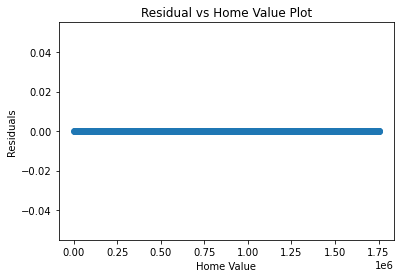

baseline_mean


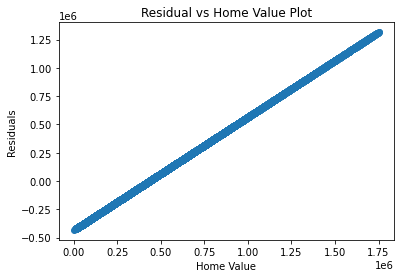

baseline_median


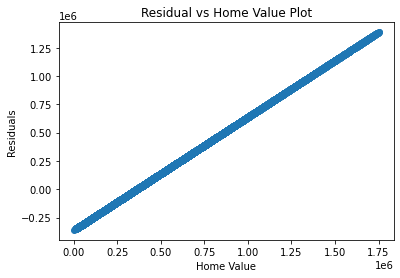

OLS_Model


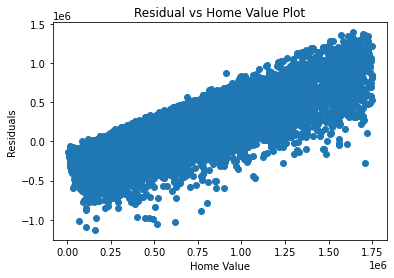

OLS_Model_f7


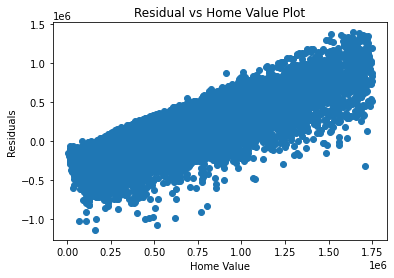

OLS_Model_f4


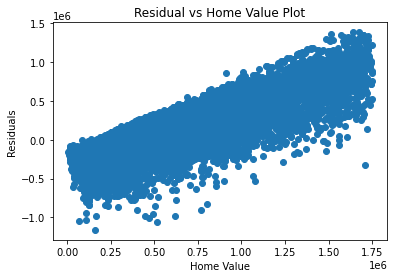

OLS_Model_f3


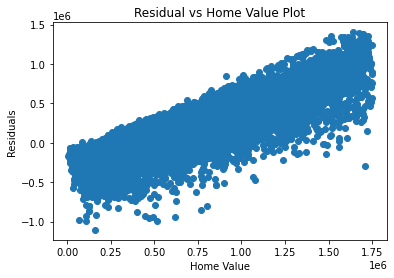

OLS_rfe7


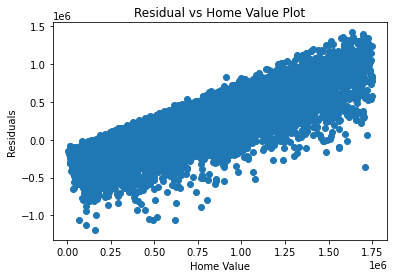

OLS_rfe4


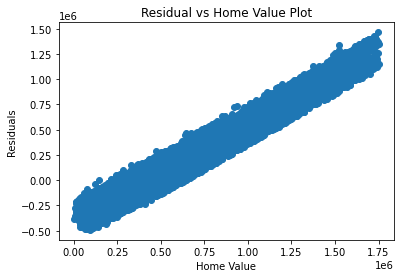

OLS_rfe3


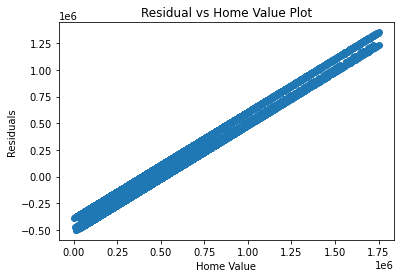

OLS_rfe2


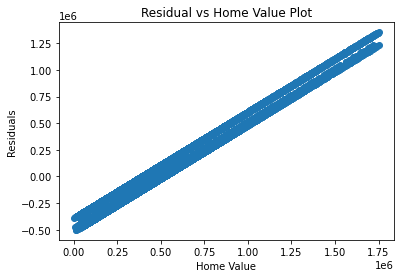

poly_d2


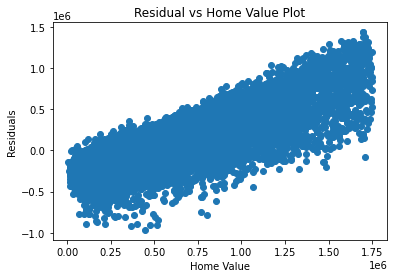

poly_d3


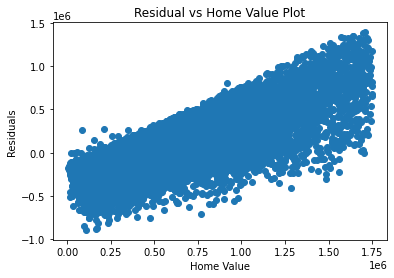

poly_d4


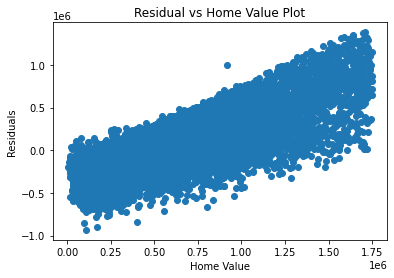

In [75]:
for i in col:  
    print(i)
    plot_residuals(y_train, i, train_pred)





In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def regression_errors(actual, yhat,df):

    residual = actual - df[yhat]
    
    mse = mean_squared_error(actual, df[yhat])
    sse = (residual **2).sum()
    rmse = sqrt(mse)
    tss = ((actual - df[yhat].mean()) ** 2).sum()
    ess = ((df[yhat] - actual.mean()) ** 2).sum()
    print(f""" 
    MSE: {round(mse,2)}
    SSE: {round(sse,2)}
    RMSE: {round(rmse,2)}
    TSS: {round(tss,2)}
    ESS: {round(ess,2)}
    """)

In [86]:
for i in col:  
    print(i)
    regression_errors(y_train, i, train_pred)



actual
 
    MSE: 0.0
    SSE: 0.0
    RMSE: 0.0
    TSS: 3119898990285849.0
    ESS: 3119898990285849.0
    
baseline_mean
 
    MSE: 110795802062.78
    SSE: 3119898990285849.0
    RMSE: 332860.03
    TSS: 3119898990285849.5
    ESS: 0.0
    
baseline_median
 
    MSE: 115989393441.27
    SSE: 3266145329912836.0
    RMSE: 340572.16
    TSS: 3266145329912836.0
    ESS: 146246339626987.06
    
OLS_Model
 
    MSE: 72631943457.16
    SSE: 2045242895810111.0
    RMSE: 269503.14
    TSS: 3119900479304989.0
    ESS: 1075476782406197.5
    
OLS_Model_f7
 
    MSE: 73527632768.31
    SSE: 2070464611122751.0
    RMSE: 271159.79
    TSS: 3119900558749875.0
    ESS: 1052513021406581.8
    
OLS_Model_f4
 
    MSE: 73745661127.3
    SSE: 2076604071683534.5
    RMSE: 271561.52
    TSS: 3119898990285849.5
    ESS: 1043294918602332.4
    
OLS_Model_f3
 
    MSE: 73971920691.96
    SSE: 2082975314764831.2
    RMSE: 271977.79
    TSS: 3119898990285849.0
    ESS: 1036923675521034.4
    
OLS_rfe7
 
    

* metric

In [ ]:
# prep data for modeling
x_train,y_train,x_validate,y_validate, x_test, y_test = m.model_prep(train,validate,test)

**The ....** 

# Comparing Models

* All ....

# Model on Test data

In [ ]:
m.get_logit_model(x_train,y_train,x_test,y_test, True)

## Modeling Summary

* A
* B

# Conclusion

## Exploration



* A
* B

## Modeling

**The final model performed....**

## Recommendations

* A
* B
* C

## Next Steps

* A
* B
* C